<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/ode6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations
# Chapter 6: Solutions to exercises

<a href="https://samyzaf.com/technion/ode/ode.pdf">
<img src="https://samyzaf.com/technion/ode/ode2.jpg" alt="ode book cover"/>
</a>

* We used Python **Sympy** package and the Jupyter-Lab enviroments for
  code-generating step-bystep final result for most of the exercises.
* These packages are still under active development, and are not yet fully tested
  and/or ready to cope with all ode's or Transforms.
  So we will appreciate your careful check and feedback of our work.
* The new site https://mathdf.com seems to be a great source
  for obtaining full step-by-step solutions for differential equations.
  Please use it for obtaining full solutions and let us know
  if it meets expectations. We will be glad to receive full solutions
  and add them here later (sz@samyzaf.com).
* This notebook can be edited and executed by clicking
  the **open in colab** button.
* These are only a small number of solutions to exercises in capter 6.
  Hopefully this will encourage students to try to solve more
  exercises with similar methods. We will be glad to accept notebooks
  with solutions to other exercises in this book.
  Please send them to sz@samyzaf.com.

In [1]:
%pip install --upgrade sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 13.5 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [2]:
from sympy import *
from IPython.display import HTML
import matplotlib.pyplot as plt

# Example

* The following is a simple example of taking a Laplace transform of $f(t)$ and
  then using partial fractions to simplify the result.

$$
f(t) = 2t + 3e^{2t} \cos 3t
$$


In [3]:
s,t = symbols("s,t")
f = 2*t + 3*exp(-2*t) * cos(3*t)
F = laplace_transform(f, t, s, noconds=True)
print("Sympy expression:")
print(F)
print("\nMath expression")
display(F)

Sympy expression:
(3*s**2*(s + 2) + 2*(s + 2)**2 + 18)/(s**2*((s + 2)**2 + 9))

Math expression


(3*s**2*(s + 2) + 2*(s + 2)**2 + 18)/(s**2*((s + 2)**2 + 9))

In [4]:
expand(F)

3*s**3/(s**4 + 4*s**3 + 13*s**2) + 8*s**2/(s**4 + 4*s**3 + 13*s**2) + 8*s/(s**4 + 4*s**3 + 13*s**2) + 26/(s**4 + 4*s**3 + 13*s**2)

In [5]:
# Partial Fractions:
F = polys.partfrac.apart(F)
display(F)

3*(s + 2)/(s**2 + 4*s + 13) + 2/s**2

In [6]:
expand(F)

3*s/(s**2 + 4*s + 13) + 6/(s**2 + 4*s + 13) + 2/s**2

# Exercise 6.2

$f(t) =
\sin t \ (0 \leq t \leq 2\pi),
\quad 0 \ (2\pi < t)
$


In [7]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)

f = Piecewise((0, t < 0), (sin(2*t), t<=2*pi), (0, True))
    
T = laplace_transform(f, t, s, noconds=True)
print(T)
display(T)

(2*exp(2*pi*s) - 2)*exp(-2*pi*s)/(s**2 + 4)


(2*exp(2*pi*s) - 2)*exp(-2*pi*s)/(s**2 + 4)

# Exercise 6.4

$f(t) = \\
 1,    \quad    0 \leq t \leq 2   \\
-1,    \quad    2 < t \leq 4
$

In [8]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = Piecewise((1, t<=2), (-1, t<=4), (0, True))
#? f = sign(2-(t%4)) # This is probably not what was meant ?!
    
T = laplace_transform(f, t, s, noconds=True)
print(T)
display(T)

Piecewise(((exp(4*s) - 2*exp(2*s) + 1)*exp(-4*s)/s, (s > 0) | (s < 0)), (0, True))


Piecewise(((exp(4*s) - 2*exp(2*s) + 1)*exp(-4*s)/s, (s > 0) | (s < 0)), (0, True))

In [9]:
F= (exp(4*s) - 2*exp(2*s) + 1)*exp(-4*s)/s
expand(F)

1/s - 2*exp(-2*s)/s + exp(-4*s)/s

* It's not clear if this is equal to $\tanh(s)/s$ !?
* Probably the problem is missing somethin!? It does not specify anything about $t>4$ ...

# Exercise 6.5.1

$e^{-t} \cos 2t$

In [10]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)

f = exp(-t) * cos(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

(s + 1)/((s + 1)**2 + 1)

In [11]:
polys.partfrac.apart(F)

(s + 1)/(s**2 + 2*s + 2)

# Exercise 6.5.2

$e^{-4t} \cosh 2t$


In [12]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)

f = exp(-4*t) * cosh(2*t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

(s + 4)/((s + 4)**2 - 4)

In [13]:
polys.partfrac.apart(F)

1/(2*(s + 6)) + 1/(2*(s + 2))

# Exercise 6.5.3

$(t^2+1)^2$


In [14]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)

f = (t**2 + 1)**2
F = laplace_transform(f, t, s, noconds=True)
display(F)

(s**4 + 4*s**2 + 24)/s**5

In [15]:
polys.partfrac.apart(F)

1/s + 4/s**3 + 24/s**5

# Exercise 6.5.4

$3 \cosh t - 4\sinh 5t$


In [16]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)

f = 3*cosh(t) - 4*sinh(5*t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

3*s/(s**2 - 1) - 20/(s**2 - 25)

In [17]:
polys.partfrac.apart(F)

2/(s + 5) + 3/(2*(s + 1)) + 3/(2*(s - 1)) - 2/(s - 5)

# Exercise 6.5.5

$t^n \sin t$

In [18]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
n = symbols("n", integer=True, positive=True)

f = t**n * sin(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

-I*(s**2 + 1)**(-n - 1)*(-s*(s - I)**n + s*(s + I)**n + I*(s - I)**n + I*(s + I)**n)*factorial(n)/2

In [19]:
expand(F)

I*s*(s - I)**n*factorial(n)/(2*s**2*(s**2 + 1)**n + 2*(s**2 + 1)**n) - I*s*(s + I)**n*factorial(n)/(2*s**2*(s**2 + 1)**n + 2*(s**2 + 1)**n) + (s - I)**n*factorial(n)/(2*s**2*(s**2 + 1)**n + 2*(s**2 + 1)**n) + (s + I)**n*factorial(n)/(2*s**2*(s**2 + 1)**n + 2*(s**2 + 1)**n)

* Sometimes it's better to look at specific examples:

In [20]:
f = t**4 * sin(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

12*I/(s + I)**5 - 12*I/(s - I)**5

In [21]:
f = t**5 * sin(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

60*I/(s + I)**6 - 60*I/(s - I)**6

In [22]:
f = t**6 * sin(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

360*I/(s + I)**7 - 360*I/(s - I)**7

In [23]:
f = t**7 * sin(t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

2520*I/(s + I)**8 - 2520*I/(s - I)**8

* Looks like the shortest general formula is:

$\displaystyle
\frac{in!}{2(s+i)^{n+1}}
-
\frac{in!}{2(s-i)^{n+1}}
$

# Exercise 6.5.6

$\dfrac{1}{(t-a)(t-b)}$

In [24]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
a,b = symbols("a b", real=True)
f = 1 / ((t-a)*(t-b))
F = laplace_transform(f, t, s, noconds=True)
display(F)

LaplaceTransform(1/(a*b - a*t - b*t + t**2), t, s)

* As we see, Sympy 1.11.1 fails to give a meaningful result.
* In such cases it's worth trying some specific cases of the general
  problem and help Sympy with partial fractions ...

In [25]:
f = 1 / ((t+3)*(t+7))
f2 = polys.partfrac.apart(f)
print(f2)
display(f2)

-1/(4*(t + 7)) + 1/(4*(t + 3))


-1/(4*(t + 7)) + 1/(4*(t + 3))

In [26]:
F = laplace_transform(f2, t, s, noconds=True)
print(F)
display(F)

(-exp(4*s)*Ei(-3*s) + Ei(-7*s))*exp(-7*s)/4


(-exp(4*s)*Ei(-3*s) + Ei(-7*s))*exp(-7*s)/4

The function Ei is

$\displaystyle
\operatorname{Ei}(x)
=
\sum_{n=1}^\infty \frac{x^n}{n\, n!}
+ \log(x) + \gamma
=
\int_{-\infty}^x \frac{e^t}{t} \mathrm{d}t
\\
\gamma = \text{Euler Constant}
$

* This exercise probably exceeds the level required for this course and should be dropped
  if no basic solution is found.

# Exercise 6.5.7

$\dfrac{3}{2t-1}$

In [27]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
f = 3 / (2*t - 1)
F = laplace_transform(f, t, s, noconds=True)
display(F)

-3*exp(s/2)*Ei(s/2)/2

* This exercise probably exceeds the level required for this course and should be dropped
  if no basic solution is found.

# Exercise 6.6.1

$
f(t) = \\
1,  \ 0\leq t < 1 \\
0,  \ 1\leq t < 2 \\
1,  \ 2\leq t < 3 \\
0,  \ 3\leq t<\infty
$



In [28]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = Heaviside(1-t) + Heaviside(t-2) - Heaviside(t-3)
F = laplace_transform(f, t, s, noconds=True)
print(F)
display(F)

(-(1 - exp(s))*exp(2*s) + exp(s) - 1)*exp(-3*s)/s


(-(1 - exp(s))*exp(2*s) + exp(s) - 1)*exp(-3*s)/s

In [29]:
expand(F)

1/s - exp(-s)/s + exp(-2*s)/s - exp(-3*s)/s

* We can validate our expression of $f(t)$ in terms of `Heaviside`
  functions by plotting the graph of $f(t)$.

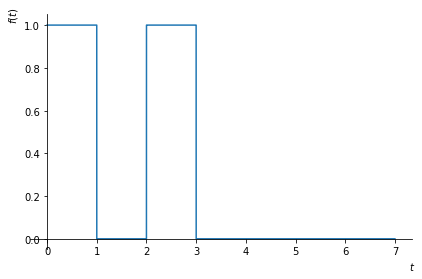

In [30]:
plot(f, (t,0,7))

# Exercise 6.6.2

$
f(t) = \\
1,        \quad  0\leq t < 2 \\
(t-2)^2,  \quad  2\leq t < \infty
$


In [31]:
s,t = symbols("s t", real=True)
    
f = Heaviside(2-t) + Heaviside(t-2) * (t-2)**2
F = laplace_transform(f, t, s, noconds=True)
display(F)

(-s**2*(1 - exp(2*s)) + 2)*exp(-2*s)/s**3

In [32]:
expand(F)

1/s - exp(-2*s)/s + 2*exp(-2*s)/s**3

* We can validate our expression of $f(t)$ in terms of `Heaviside`
  functions by plotting the graph of $f(t)$.

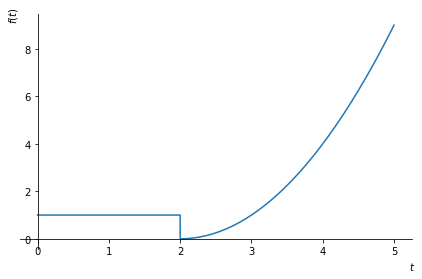

In [33]:
plot(f, (t,0,5))

# Exercise 6.6.3

$
f(t) = \\
1,        \ 0\leq t < 1 \\
t^2-2t+2, \ 1\leq t < \infty
$



In [34]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = Heaviside(1-t) + Heaviside(t-1) * (t**2 -2*t +2)
T = laplace_transform(f, t, s, noconds=True)
print("Sympy expression:")
print(T)
print("\nFinal answer:")
display(T)

Sympy expression:
1/s + 2*exp(-s)/s**3

Final answer:


1/s + 2*exp(-s)/s**3

* We can validate our expression of $f(t)$ in terms of `Heaviside`
  functions by plotting the graph of $f(t)$.

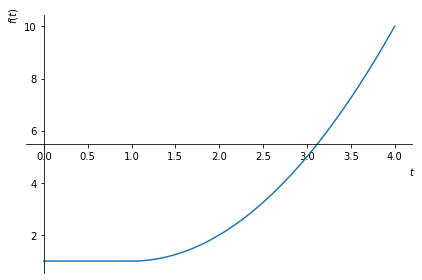

In [35]:
plot(f, (t,0,4))

# Exercise 6.6.4

$
f(t) = \\
0,      \ 0\leq t < \pi \\
t-\pi,  \ \pi\leq t < 2\pi \\
1,      \ 2\pi \leq t < \infty
$

In [36]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = (Heaviside(2*pi-t) - Heaviside(pi-t)) * (t-pi) + Heaviside(t-2*pi)
F = laplace_transform(f, t, s, noconds=True)
display(F)

(-pi*s + s + exp(pi*s) - 1)*exp(-2*pi*s)/s**2

In [37]:
expand(F)

-pi*exp(-2*pi*s)/s + exp(-2*pi*s)/s + exp(-pi*s)/s**2 - exp(-2*pi*s)/s**2

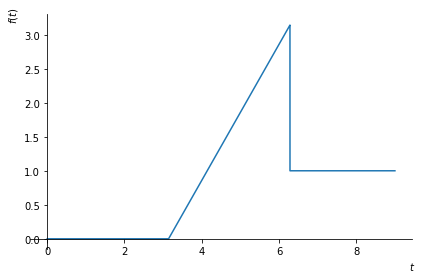

In [38]:
plot(f, (t,0,9))

# Exercise 6.6.5

$
f(t) = \\
1,        \quad 0\leq t < 1 \\
0,        \quad 1\leq t < \infty
$

In [39]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = Heaviside(1-t) 
F = laplace_transform(f, t, s, noconds=True)
display(F)

(1 - exp(-s))/s

# Exercise 6.6.6

$
f(t) = \left\{
\begin{array}{ll}
1,      &\quad  0\leq t < 2 \\
t-3,    &\quad  2\leq t < 3 \\
-1,     &\quad  3\leq t < \infty
\end{array}
\right.
$


In [40]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = Heaviside(2-t) + (Heaviside(t-2) - Heaviside(t-3)) * (t-3) - Heaviside(t-3)   
F = laplace_transform(f, t, s, noconds=True)
display(F)

(s*exp(3*s) - 2*s*exp(s) - s + exp(s) - 1)*exp(-3*s)/s**2

In [41]:
expand(F)

1/s - 2*exp(-2*s)/s - exp(-3*s)/s + exp(-2*s)/s**2 - exp(-3*s)/s**2

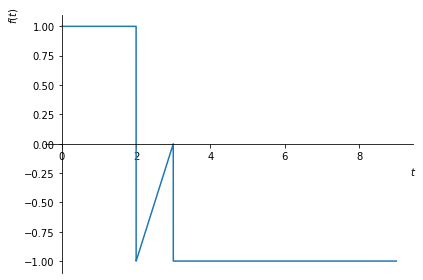

In [42]:
plot(f, (t,0,9))

# Exercise 6.7

$f(t) = \dfrac{\sin t}{t}$

In [43]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = sin(t)/t   
T = laplace_transform(f, t, s, noconds=True)
print(T)
display(T)

atan(1/s)


atan(1/s)

# Exercise 6.8

${\cal L}[f](s) = \dfrac{d^n}{ds^n} \left[\dfrac{1}{s^2 -a^2}\right]$

Objective: what is $f(t)$ ?

* Sympy still not ready to deal with abstract $n$-th derivative.
* We will compute several particular cases $n=1,2,3$ and guess the general solution.

In [44]:
t = symbols("t", real=True, positive=True)
s, a = symbols("s a", real=True)

F = diff(s/(s**2 - a**2), s)
print(F)
display(F)

-2*s**2/(-a**2 + s**2)**2 + 1/(-a**2 + s**2)


-2*s**2/(-a**2 + s**2)**2 + 1/(-a**2 + s**2)

In [45]:
inverse_laplace_transform(F, s, t)

-t*cosh(a*t)

In [46]:
F = diff(s/(s**2 - a**2), (s,2))
print(F)
display(F)

-2*s*(4*s**2/(a**2 - s**2) + 3)/(a**2 - s**2)**2


-2*s*(4*s**2/(a**2 - s**2) + 3)/(a**2 - s**2)**2

In [47]:
expand(F)

-8*s**3/(a**6 - 3*a**4*s**2 + 3*a**2*s**4 - s**6) - 6*s/(a**4 - 2*a**2*s**2 + s**4)

In [48]:
inverse_laplace_transform(F, s, t)

t**2*cosh(a*t)

In [49]:
F = diff(s/(s**2 - a**2), (s,3))
print(F)
display(F)

-6*(4*s**2*(2*s**2/(a**2 - s**2) + 1)/(a**2 - s**2) + 4*s**2/(a**2 - s**2) + 1)/(a**2 - s**2)**2


-6*(4*s**2*(2*s**2/(a**2 - s**2) + 1)/(a**2 - s**2) + 4*s**2/(a**2 - s**2) + 1)/(a**2 - s**2)**2

In [50]:
expand(F)

-48*s**4/(a**8 - 4*a**6*s**2 + 6*a**4*s**4 - 4*a**2*s**6 + s**8) - 48*s**2/(a**6 - 3*a**4*s**2 + 3*a**2*s**4 - s**6) - 6/(a**4 - 2*a**2*s**2 + s**4)

In [51]:
inverse_laplace_transform(F, s, t)

-t**3*cosh(a*t)

* Looks like the general formula is

$
\qquad f(t) = (-1)^n t^n \cosh(at)
$
* But you still need to prove it formally !!

# Exercise 6.9.1

Prove:

$\displaystyle
{\cal L}[\sin^2 t](s) = \frac{2}{s(s^2+4)}$

* First lets validate this identity

In [52]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = sin(t)**2 
F = laplace_transform(f, t, s, noconds=True)
display(F)

2/(s*(s**2 + 4))

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.9.1.pdf)

# Exercise 6.9.2

Prove:

$\displaystyle
{\cal L}[A \cos (\omega t + \theta)] (s)
=
\frac{A(s\cos\theta - \omega\sin\theta)}{s^2+\omega^2}$


* First, lets verify that this identity is true.

In [53]:
t,w,theta = symbols("t w theta", real=True, positive=True)
s, A = symbols("s A", real=True)
    
f = A * cos(w*t + theta)
F = laplace_transform(f, t, s, noconds=True)
display(F)

A*(s*cos(theta) - w*sin(theta))/(s**2 + w**2)

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.9.2.pdf)

# Exercise 6.9.3

Prove:

$\displaystyle
{\cal L}[\cos at \cosh at](s)
=
\frac{s^3}{s^4+4a^4}$


* First, lets verify that this identity is true.

In [54]:
t,s,a = symbols("t s a", real=True, positive=True)
    
f = cos(a*t) * cosh(a*t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

s**3/(4*a**4 + s**4)

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.9.3.pdf)

# Exercise 6.9.4

Prove:

$\displaystyle
{\cal L}[(t^2-5t+6)e^{2t}]
=
\frac{6s^2 -29s+36}{(s-2)^3}$


* First, lets verify that this identity is true.

In [55]:
t,s = symbols("t s", real=True, positive=True)
    
f = (t**2 - 5*t + 6) * exp(2*t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

(-5*s + 6*(s - 2)**2 + 12)/(s - 2)**3

In [56]:
expand(F)

6*s**2/(s**3 - 6*s**2 + 12*s - 8) - 29*s/(s**3 - 6*s**2 + 12*s - 8) + 36/(s**3 - 6*s**2 + 12*s - 8)

* This is exactly what is expected.

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.9.4.pdf)

# Exercise 6.10.1

$\int_{0}^{\infty} te^{-2t} \cos t \, dt$


In [57]:
f = t*cos(t)
F = laplace_transform(f,t,s, noconds=True)
display(F)

(s**2 - 1)/(s**4 + 2*s**2 + 1)

In [58]:
F.subs(s,-2)

3/25

In [59]:
F = lambdify(s, F)
F(-2)

0.12

* The function `lambdify(s, F)` converts `F` into a regular Python function.

# Exercise 6.10.2

$\int_{0}^{\infty} t^3 e^{-t}\sin t \, dt$

In [60]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
    
f = t**3 * exp(-t) * sin(t)
integrate(f, (t,0,oo))

0

* We may use Laplace Transform to solve this integral as follows

$\int_{0}^{\infty} t^3 e^{-t}\sin t \, dt = {\cal L}[t^3\sin t](1)$

In [61]:
f = t**3 * sin(t)
F = laplace_transform(f,t,s, noconds=True)
display(F)

3*I/(s + I)**4 - 3*I/(s - I)**4

In [62]:
a = F.subs(s, 1)
display(a)

3*I/(1 + I)**4 - 3*I/(1 - I)**4

In [63]:
a.as_real_imag()

(0, 0)

# Exercise 6.10.3

$\int_{0}^{\infty} x^4 e^{-x} dx$


In [64]:
x = symbols("x", real=True, positive=True)
    
f = x**4 * exp(-x)
integrate(f, (x,0,oo))

24

In [65]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
f = t**4
F = laplace_transform(f,t,s, noconds=True)
display(F)

24/s**5

In [66]:
a = F.subs(s, 1)
display(a)

24

# Exercise 6.10.4

$\int_{0}^{\infty} x^6 e^{-3x} dx$


In [67]:
x = symbols("x", real=True, positive=True)
    
f = x**6 * exp(-3*x)
integrate(f, (x,0,oo))

80/243

In [68]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
f = t**6
F = laplace_transform(f,t,s, noconds=True)
display(F)

720/s**7

In [69]:
a = F.subs(s, 3)
display(a)

80/243

# Exercise 6.15.1 (Inverse Laplance Transform)

$\dfrac{3s-14}{s^2-4s+18}$

In [70]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = (3*s - 14) / (s**2 - 4*s + 18)
f = inverse_laplace_transform(F, s, t)
display(f)

(-4*sqrt(14)*sin(sqrt(14)*t)/7 + 3*cos(sqrt(14)*t))*exp(2*t)

# Exercise 6.15.2

$\dfrac{1}{s^2(s^2+1)}$


In [71]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = 1 / (s**2 * (s**2 +1))
f = inverse_laplace_transform(F, s, t)
display(f)

t - sin(t)

# Exercise 6.15.3

$\dfrac{1}{s^2 - 3s + 2}$


In [72]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = 1 / (s**2 - 3*s +2)
f = inverse_laplace_transform(F, s, t)
display(f)

(exp(t) - 1)*exp(t)

# Exercise 6.15.4

$\dfrac{s^2}{(s^2+4)^2}$


In [73]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = s**2 / (s**2 + 4)**2
f = inverse_laplace_transform(F, s, t)
display(f)

sin(2*t)/2

# Exercise 6.15.5

$\dfrac{s}{(s^2+4)^2}$


In [74]:
t = symbols("t", real=True, positive=True)
s = symbols("s")
F = s / (s**2 + 4)**2
f = inverse_laplace_transform(F, s, t)
display(f)

Piecewise((0, (exp(t) < 1) | (exp(-t) < 1)), (meijerg(((0, 1 - 2*I, 1 - 2*I, 1 + 2*I, 1 + 2*I), ()), ((), (1, -2*I, -2*I, 2*I, 2*I)), exp(t)), True))

* In case it does not work, we may try to use the integral form of the inverse Laplace transform

$\displaystyle
\qquad
f(t)=\frac{1}{2\pi i}\int_{s'-i\infty}^{s'+i\infty}e^{st}F(s)ds
$

# Exercise 6.15.6

$\ln\left(1+\dfrac{1}{s^2}\right)$


In [75]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = log(1 + 1/s**2)
f = inverse_laplace_transform(F, s, t)
display(f)

InverseLaplaceTransform(log(1 + s**(-2)), s, t, _None)

* Sympy 1.11.1 failed to solve ...
* Tried other integral calculators and they also failed. Probably bad problem ...

# Exercise 6.15.7

$\dfrac{1}{(s^2+4)^2}$

In [76]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = 1 / (s**2 + 4)**2
f = inverse_laplace_transform(F, s, t)
display(f)

Piecewise((0, (exp(t) < 1) | (exp(-t) < 1)), (meijerg(((1 - 2*I, 1 - 2*I, 1 + 2*I, 1 + 2*I), ()), ((), (-2*I, -2*I, 2*I, 2*I)), exp(t)), True))

# Exercise 6.15.8

$\dfrac{s^3}{s^4-16}$

In [77]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = s**3 / (s**4 - 16)
f = inverse_laplace_transform(F, s, t)
display(f)

cos(2*t)/2 + cosh(2*t)/2

# Exercise 6.15.9

$\dfrac{1}{s^3+1}$

In [78]:
t = symbols("t", real=True, positive=True)
s = symbols("s")
F = 1 / (s**3 + 1)
f = inverse_laplace_transform(F, s, t)
display(f)

(-6*exp(3*t/2)*cos(sqrt(3)*t/2 + pi/3) + 3)*exp(-t)/9

In [79]:
expand(f)

-2*exp(t/2)*cos(sqrt(3)*t/2 + pi/3)/3 + exp(-t)/3

# Exercise 6.15.10

$\dfrac{2s^2+s-10}{(s-4)(s^2+2s+2)}$


In [80]:
t = symbols("t", real=True, positive=True)
s = symbols("s", real=True)
F = (2*s**2 + s -10) / ((s-4) * (s**2 + 2*s +2))
f = inverse_laplace_transform(F, s, t)
display(f)

(exp(5*t) + 2*sin(t) + cos(t))*exp(-t)

In [81]:
expand(f)

exp(4*t) + 2*exp(-t)*sin(t) + exp(-t)*cos(t)

# Exercise 6.16.1

$
y'' + 3y' - 4y = 0, \\
y(0)=3, \\
y'(0)=-2
$

* It is very easy to solve this equation as a homogeneous
  second order linear equation with constant coefficients (see section 4.7 of the book).
* But here we are required to solve it by the Laplace transform method.
* We'll do it for the first one and get only final results for the rest.

In [82]:
y = symbols("y", cls=Function)
s,t = symbols("s t", real=True)
F = laplace_transform(y(t).diff(t,t) + 3*y(t).diff(t) - 4*y(t), t, s)
print(F)

s**2*LaplaceTransform(y(t), t, s) + 3*s*LaplaceTransform(y(t), t, s) - s*y(0) - 4*LaplaceTransform(y(t), t, s) - 3*y(0) - Subs(Derivative(y(t), t), t, 0)


In [83]:
F = s**2*LaplaceTransform(y(t), t, s) + 3*s*LaplaceTransform(y(t), t, s) - s*3 - 4*LaplaceTransform(y(t), t, s) - 3*3 + 2

In [84]:
E = collect(F, LaplaceTransform(y(t), t, s))
print(E)
G = solve(E, LaplaceTransform(y(t), t, s))[0]
print(G)

-3*s + (s**2 + 3*s - 4)*LaplaceTransform(y(t), t, s) - 7
(3*s + 7)/(s**2 + 3*s - 4)


In [85]:
inverse_laplace_transform(G, s, t)

(2*exp(5*t) + 1)*exp(-4*t)*Heaviside(t)

* The term $\theta(t)$ is the same as our Heaviside function $u_0(t)$ which we use in the book.
* It is used to indicate that our solution was sought for the $[0,\infty)$ interval only.

# Exercise 6.16.2

$
y'' - y = 0, \\
y(0)=1, \\
y'(0)=-1
$

In [86]:
t = symbols("t", real=True)
y = symbols("y", cls=Function)
de = Eq(y(t).diff(t,t) - y(t) , 0)
Y = dsolve(de, y(t) , ics={y(0): 1, y(t).diff(t).subs(t,0): -1})
display(Y)

Eq(y(t), exp(-t))

# Exercise 6.16.3

$
y'' + 4y' + 4y = 0, \\
y(0)=1, \\
y'(0)=0
$

In [87]:
t = symbols("t", real=True)
y = symbols("y", cls=Function)
de = Eq(y(t).diff(t,t) + 4*y(t).diff(t) + 4*y(t) , 0)
Y = dsolve(de, y(t) , ics={y(0): 1, y(t).diff(t).subs(t,0): 0})
display(Y)

Eq(y(t), (2*t + 1)*exp(-2*t))

# Exercise 6.16.4

$
y'' + 4y = 0, \\
y(0)=2, \\
y'(0)=1
$

In [88]:
t = symbols("t", real=True)
y = symbols("y", cls=Function)
de = Eq(y(t).diff(t,t) + 4*y(t) , 0)
Y = dsolve(de, y(t) , ics={y(0): 2, y(t).diff(t).subs(t,0): 1})
display(Y)

Eq(y(t), sin(2*t)/2 + 2*cos(2*t))

# Exercise 6.16.5

$
y'' + 4y' + 7y = 0, \\
y(0)=1, \\
y'(0)=1
$

In [89]:
t = symbols("t", real=True)
y = symbols("y", cls=Function)
de = Eq(y(t).diff(t,t) + 4*y(t).diff(t) + 4*y(t) , 0)
Y = dsolve(de, y(t) , ics={y(0): 1, y(t).diff(t).subs(t,0): 1})
display(Y)

Eq(y(t), (3*t + 1)*exp(-2*t))

# Exercise 6.16.6

$
ty''(t) + 2y'(t) + ty(t) = 0, \\
y(0)=1, \\
y'(0)=0
$

In [104]:
t = symbols("t", real=True)
y = symbols("y", cls=Function)
de = Eq(t*y(t).diff(t,t) + 2*y(t).diff(t) + t*y(t) , 0)
Y = dsolve(de, y(t) , ics={y(0): 1, y(t).diff(t).subs(t,0): 0})
display(Y)

Eq(y(t), C1*besselj(1/2, t)/sqrt(t))

In [91]:
print(Y)

Eq(y(t), C1*besselj(1/2, t)/sqrt(t))


* $J$ is the Bessel function, which is not covered in this course.
* So this problem should be dropped from the list ...
* See [Bessel Function on Wikipedia](https://en.wikipedia.org/wiki/Bessel_function)

# Exercise 6.17.1

$
f(t) = \\
1, \  0\leq t \leq T    \\
0, \  t>T
$

In [92]:
s,t,T = symbols("s t T", real=True)

f = Heaviside(1-t) * T 
F = laplace_transform(f, t, s, noconds=True)
display(F)

T*(1 - exp(-s))/s

In [93]:
expand(F)

T/s - T*exp(-s)/s

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.1.pdf)

# Exercise 6.17.2

$
f(t) = \\
0,        \  0\leq t \leq 1 \\
(t-1)^2,  \  t > 1
$

In [94]:
s,t,T = symbols("s t T", real=True)
    
f = Heaviside(t-1) * (t-1)**2
F = laplace_transform(f, t, s, noconds=True)
display(F)

2*exp(-s)/s**3

### Alternative solution
* In other cases we may need to proceed by definition ..

In [95]:
i = Integral(exp(-s*t) * (t-1)**2 , t)
i = i.doit()
print(i)

Piecewise(((-s**2*t**2 + 2*s**2*t - s**2 - 2*s*t + 2*s - 2)*exp(-s*t)/s**3, Ne(s**3, 0)), (t**3/3 - t**2 + t, True))


* Sympy gives two parts for cases in which $s$ is complex which does not concern us.
* Only the first case is relevant:

In [96]:
i = (-s**2*t**2 + 2*s**2*t - s**2 - 2*s*t + 2*s - 2)*exp(-s*t)/s**3
F = -i.subs(t,1)
display(F)

2*exp(-s)/s**3

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.2.pdf)

# Exercise 6.17.3

$
f(t) = \\
t^2,  \  0 \leq t < 2    \\
4t,   \  t \geq 2
$

In [97]:
s,t,T = symbols("s t T", real=True)
    
f = Heaviside(2-t) * t**2 + Heaviside(t-2) * 4*t
F = laplace_transform(f, t, s, noconds=True)
display(F)

2*(2*s**2 + exp(2*s) - 1)*exp(-2*s)/s**3

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.3.pdf)

In [98]:
expand(F)

4*exp(-2*s)/s + 2/s**3 - 2*exp(-2*s)/s**3

# Exercise 6.17.4

$
f(t) = \\
t,    \quad \;   0\leq t\leq 7          \\
3-t,  \quad \;   7<t<8                  \\
1,    \quad \;   8 \leq t
$

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.4.pdf)

# Exercise 6.17.5

$
f(t) = \\
0,    \  t<a \\
5,  \  a \leq t < b    \\
0,   \  b< t 
$

In [99]:
s,t,a,b = symbols("s t a b", real=True)
    
f = 5*Heaviside(t-a) - 5*Heaviside(t-b)
F = laplace_transform(f, t, s, noconds=True)
#print(F)
display(F)

-5*exp(-b*s)/s + 5*exp(-a*s)/s

* Lets try to plot an example for $a=3$, $b=7$.

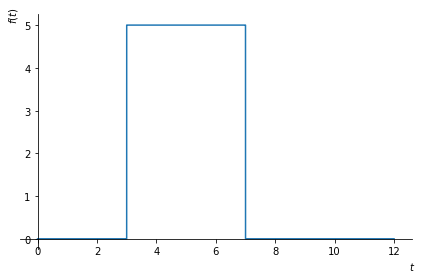

In [100]:
f = 5*Heaviside(t-3) - 5*Heaviside(t-7)
plot(f, (t,0,12))

## [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.5.pdf)

# Exercise 6.17.6

$
f(t) = \\
0,    \quad \;  0 \leq t < 1    \\
1,    \quad \;  1 \leq t < 4    \\
4,    \quad \;  t\geq 4
$

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.6.pdf)

# Exercise 6.17.7

$
f(t) = \\
0,     \quad \;  0 \leq t < 1    \\
t-1,   \quad \;  1 \leq t < 3    \\
8-2t,  \quad \;  3\leq t<4 \\
0,     \quad \;  4 \leq t
$

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.7.pdf)

# Exercise 6.17.8

$
f(t) = u_1(t) + 3u_5(t)
$

In [101]:
s,t = symbols("s t", real=True)
    
f = Heaviside(t-1) + 3*Heaviside(t-5)
F = laplace_transform(f, t, s, noconds=True)
display(F)

(exp(4*s) + 3)*exp(-5*s)/s

In [102]:
expand(F)

exp(-s)/s + 3*exp(-5*s)/s

# Exercise 6.17.9

$
f(t) = \\
\cos 2t,  \quad \;  0 \leq t < \pi  \\
0,        \quad \;  \pi\leq t<\infty
$

In [103]:
s,t = symbols("s t", real=True)
    
f = Heaviside(pi - t) * cos(2*t)
F = laplace_transform(f, t, s, noconds=True)
display(F)

s*(exp(pi*s) - 1)*exp(-pi*s)/(s**2 + 4)

### [Link to step-by-step-solution](https://samyzaf.com/technion/ode/sol/chap6.17.9.pdf)

# **TO BE CONTINUED ...**
* Any student with a basic Python programming skill
  is welcome to continue and solve more exercises
  from the
<a href="https://samyzaf.com/technion/ode/ode.pdf">
Ordinal Differential Equations book
</a>.

* Send your solutions notebook to sz@samyzaf.com.
* They will be checked and added to this notebook.
* Thanks!!!